# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [111]:
# Installing the libraries with the specified version.
# pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, make_scorer, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
data = pd.read_csv('INNHotelsGroup.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.drop('Booking_ID', axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Data Overview

- Observations
- Sanity checks

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [9]:
data.shape

(36275, 18)

In [10]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

The above three cells confirm that there are no null values in the dataset. There are 19 features and 36,275 rows. 

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


### Outliers
Identify and handle outliers

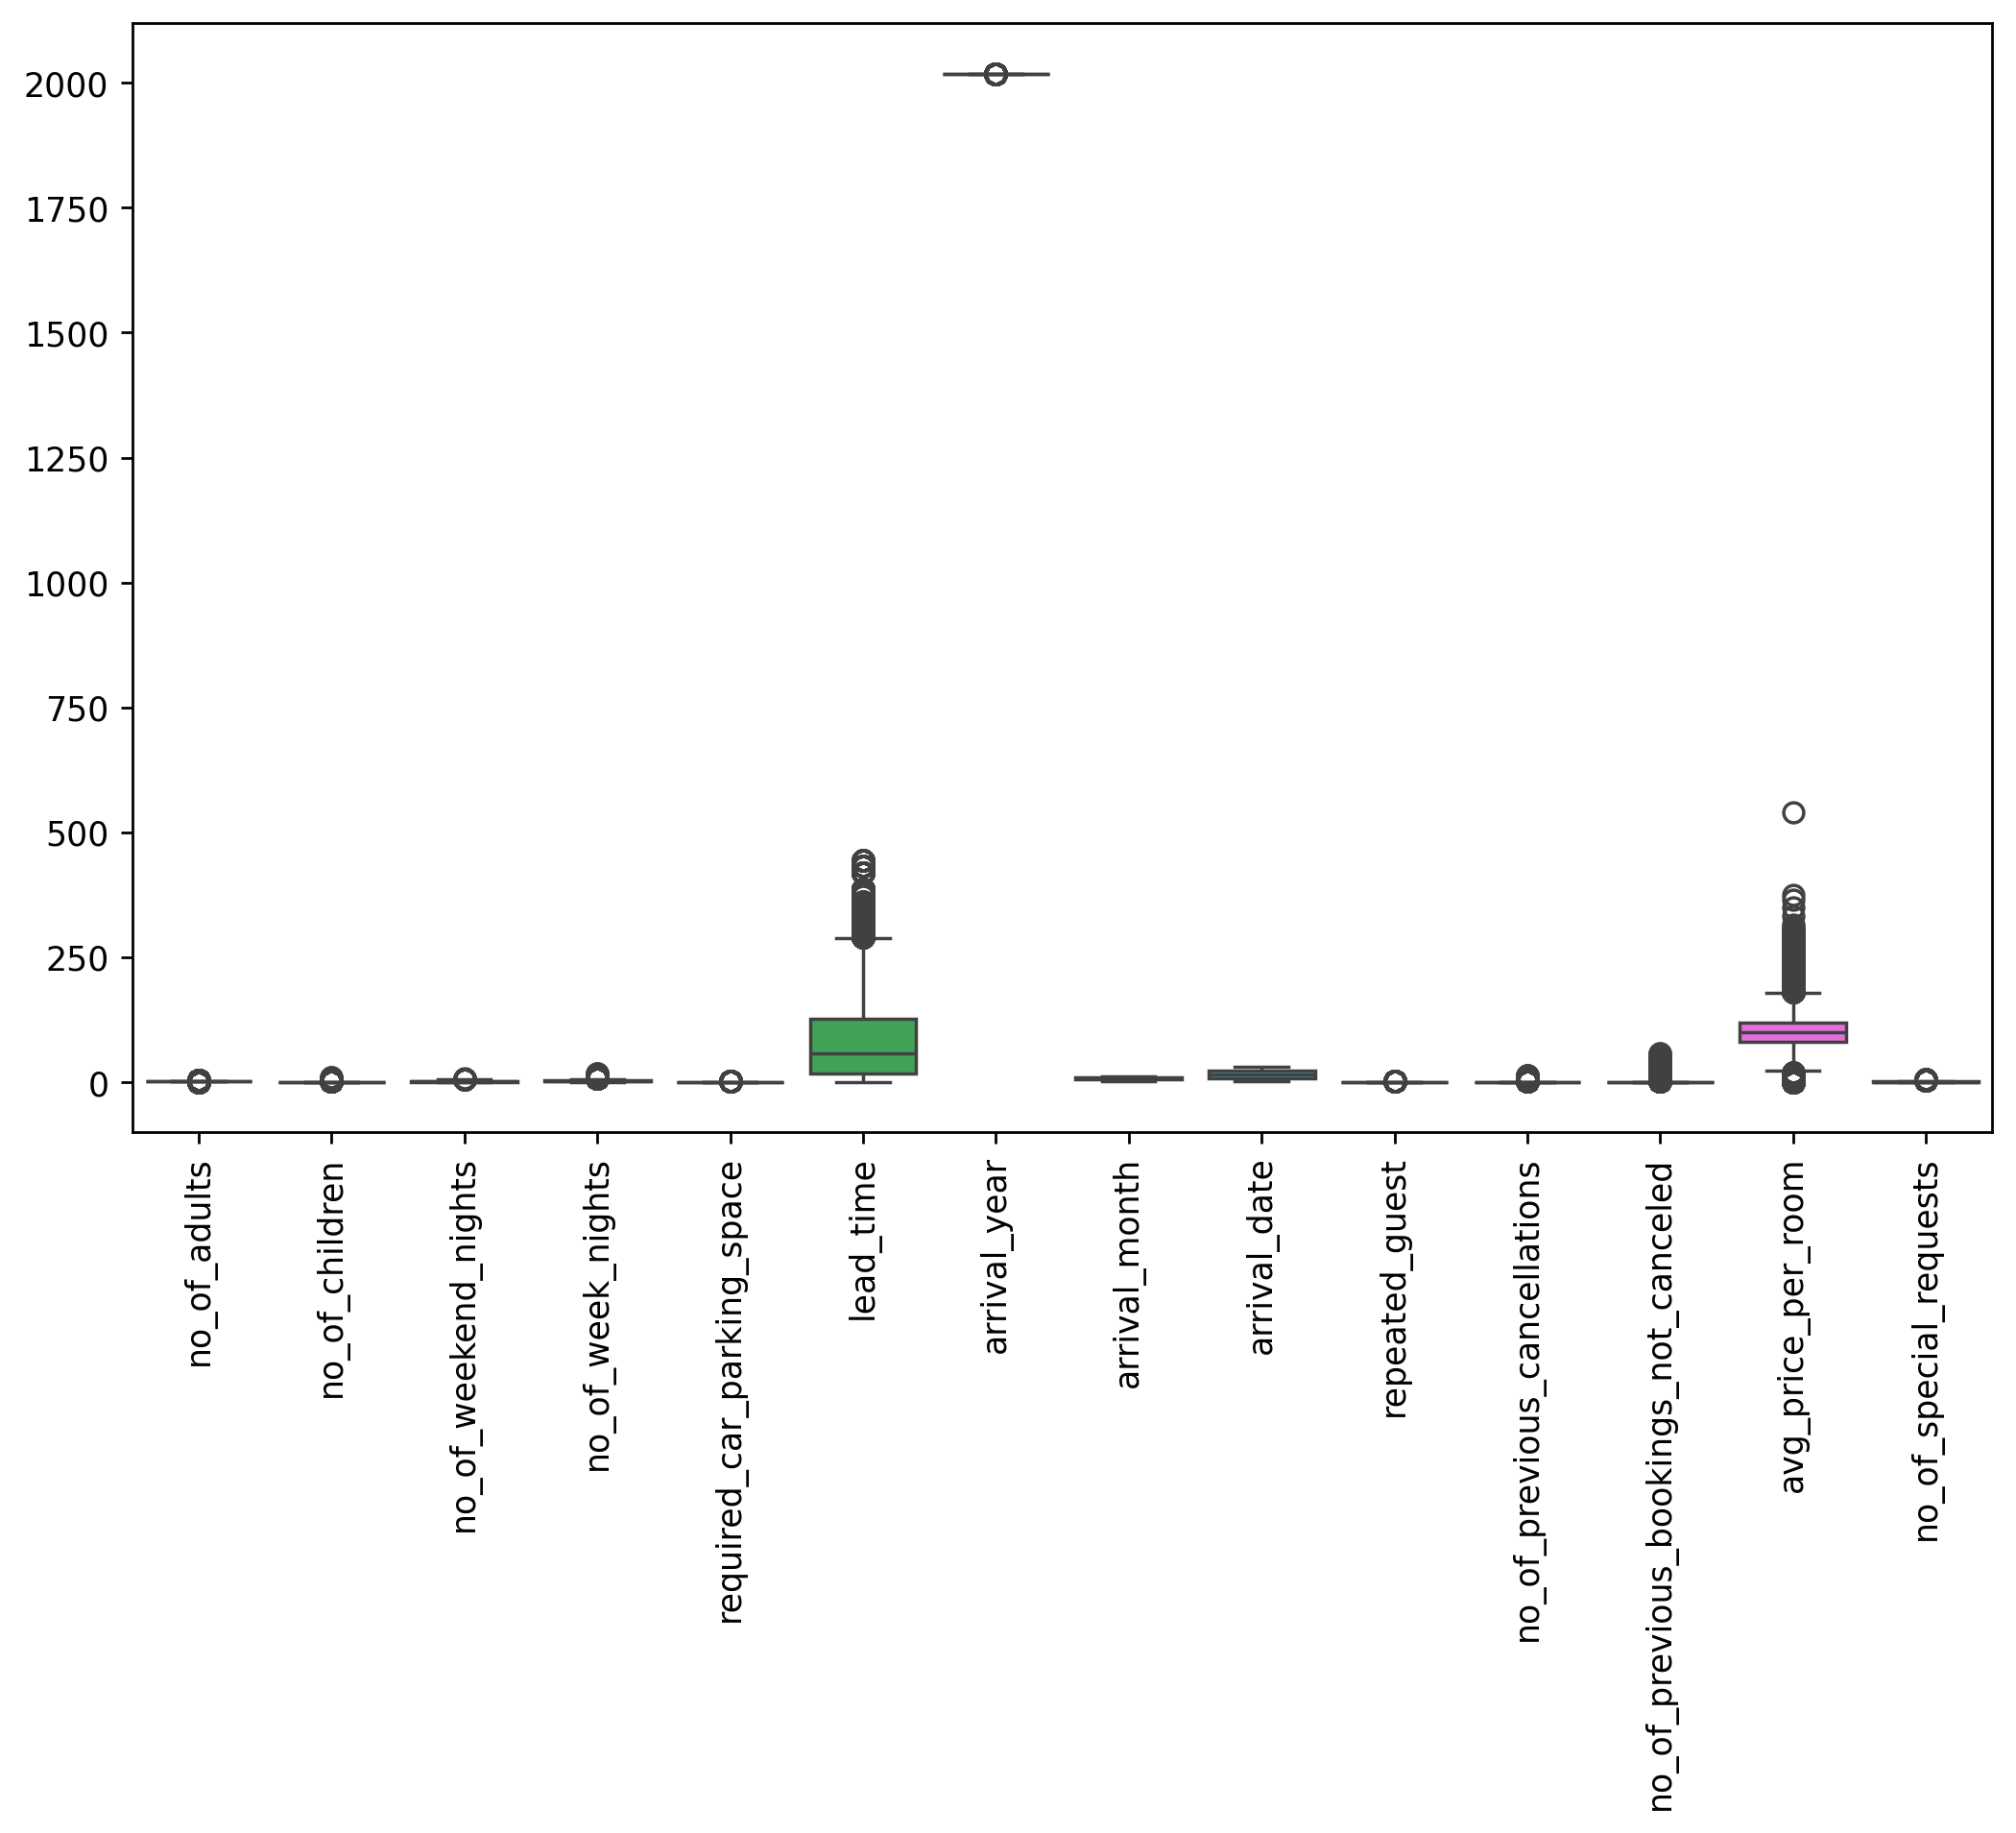

In [14]:
plt.figure(figsize=(10, 6), dpi=250)
plt.xticks(rotation=90)
sns.boxplot(data=data);

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

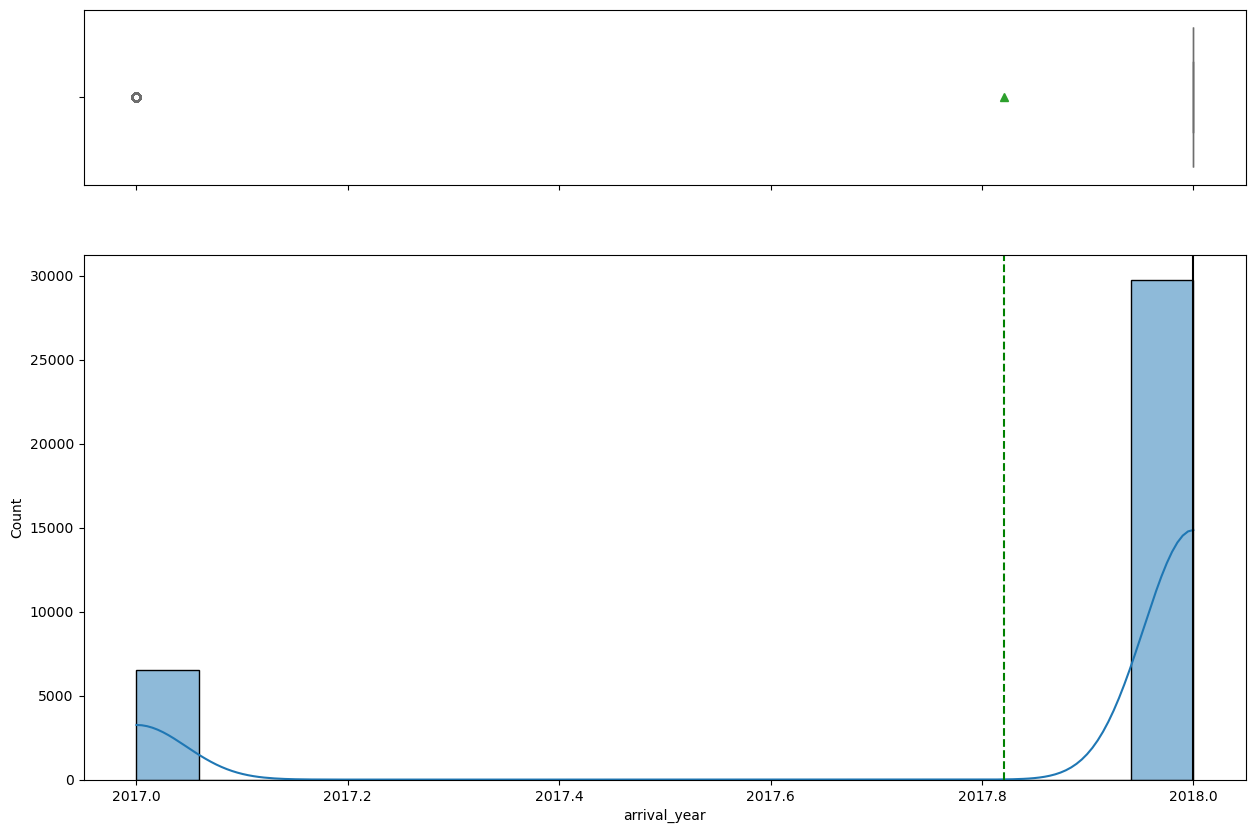

In [16]:
histogram_boxplot(data, "arrival_year")

No useable information from this chart

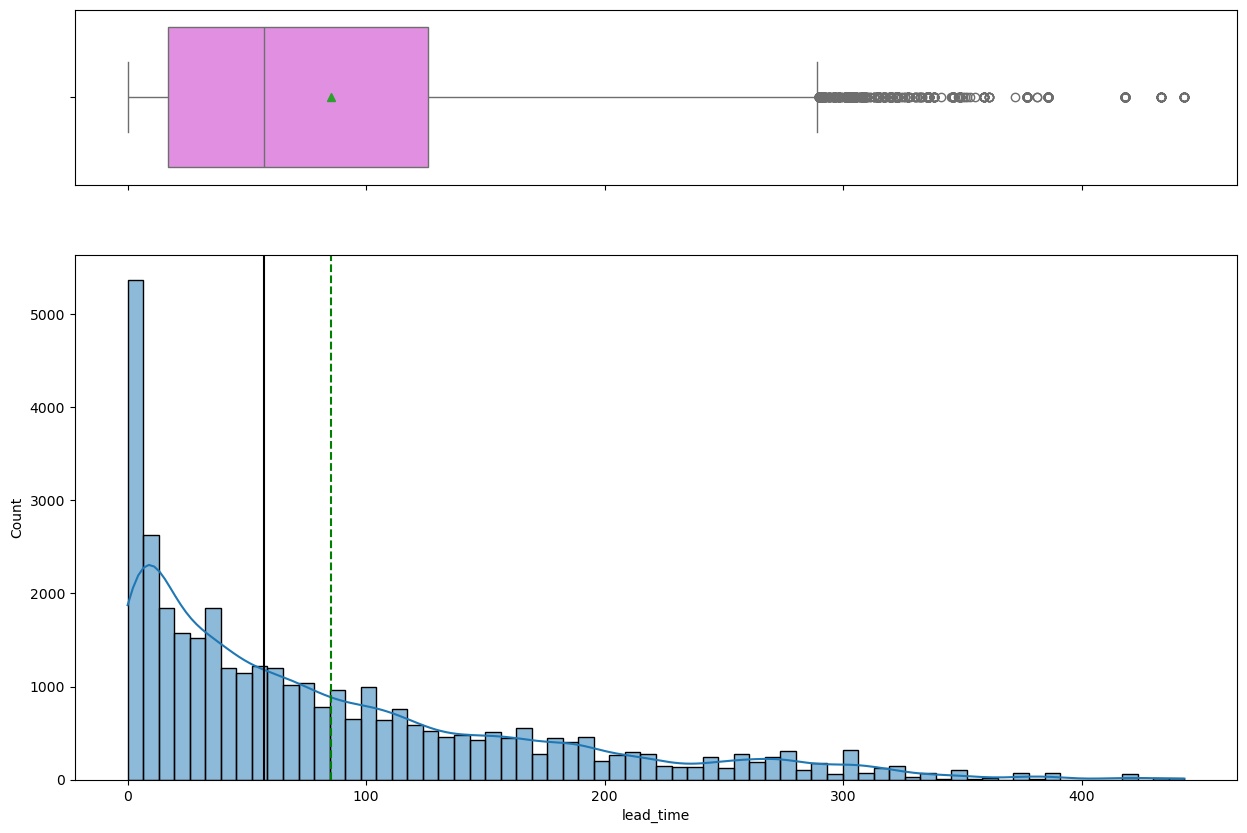

In [18]:
histogram_boxplot(data, "lead_time")

I am going to only address upper outliers in this group

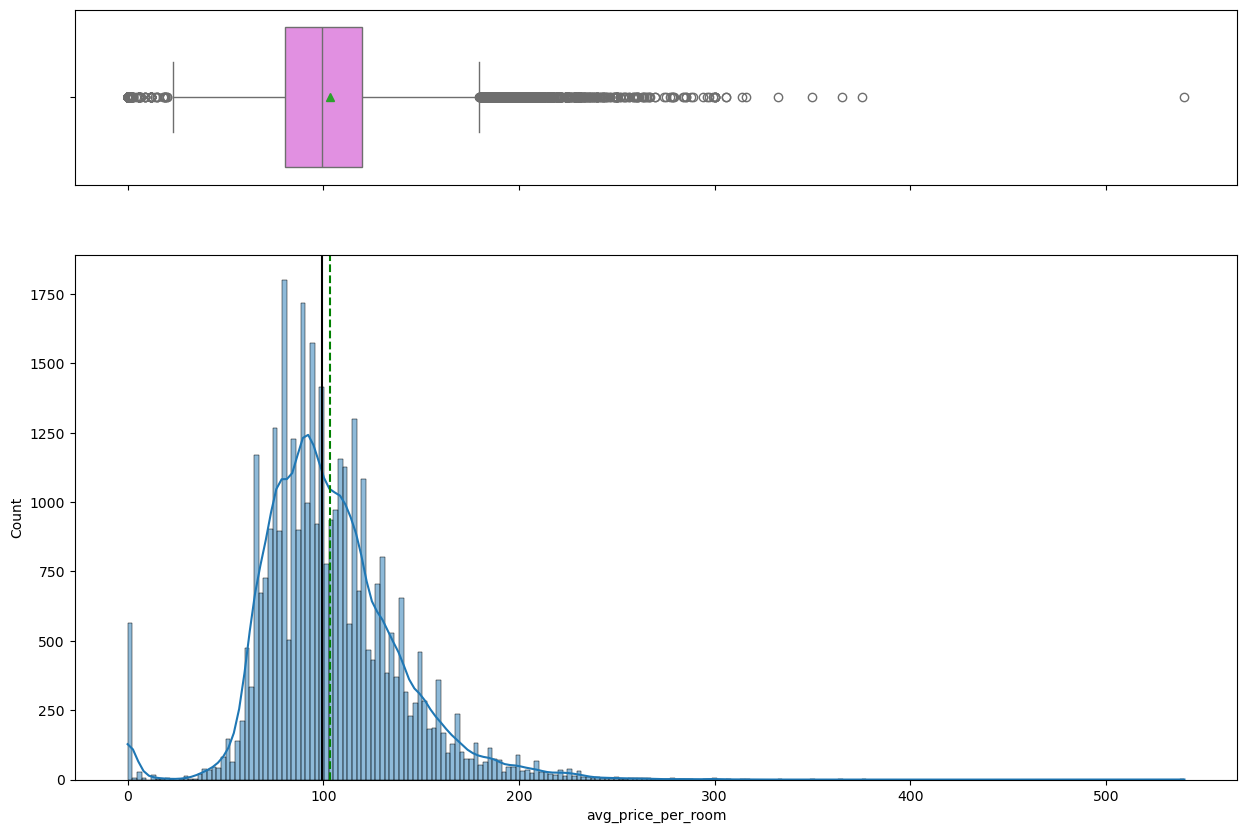

In [20]:
histogram_boxplot(data, "avg_price_per_room")

Outliers that need to be addressed on both ends - free rooms?

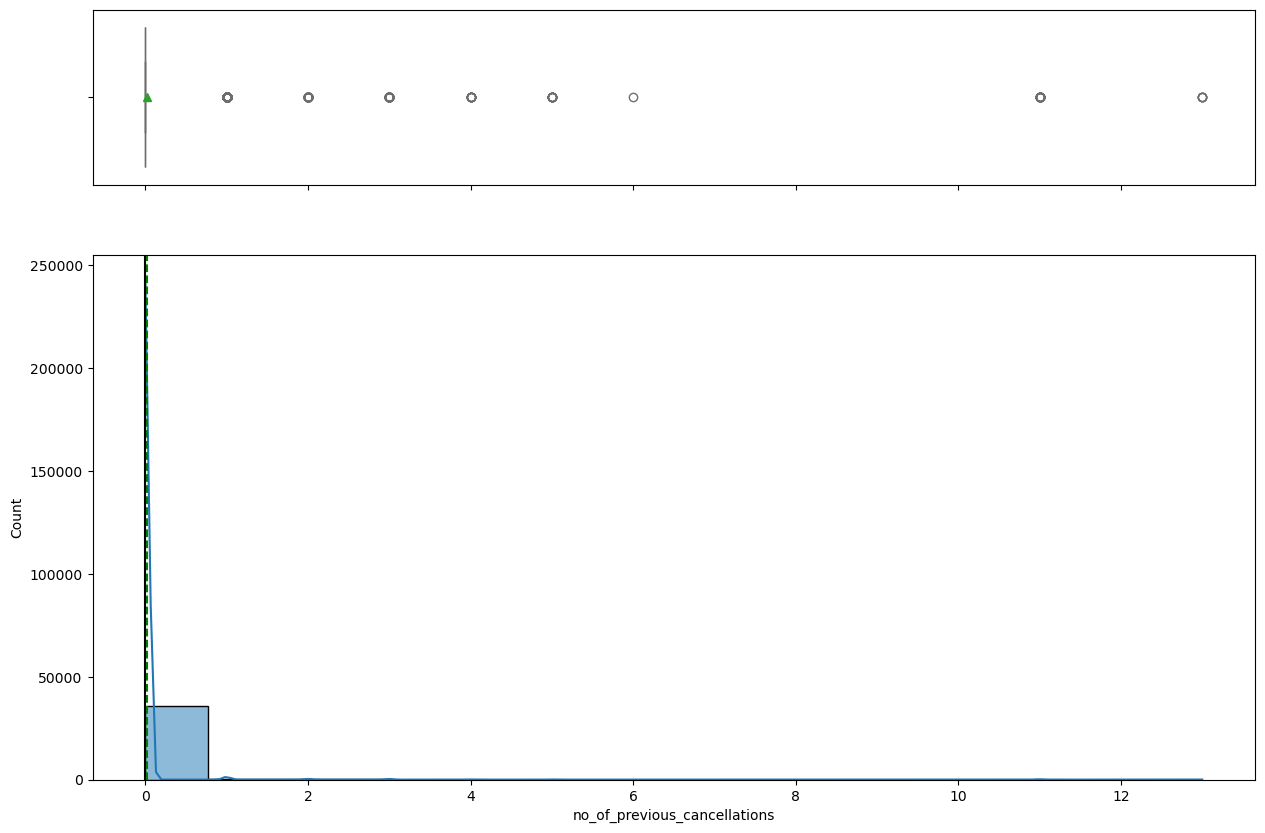

In [22]:
histogram_boxplot(data, "no_of_previous_cancellations")

While there are outliers on the upper end of this feature this may be important information for the model

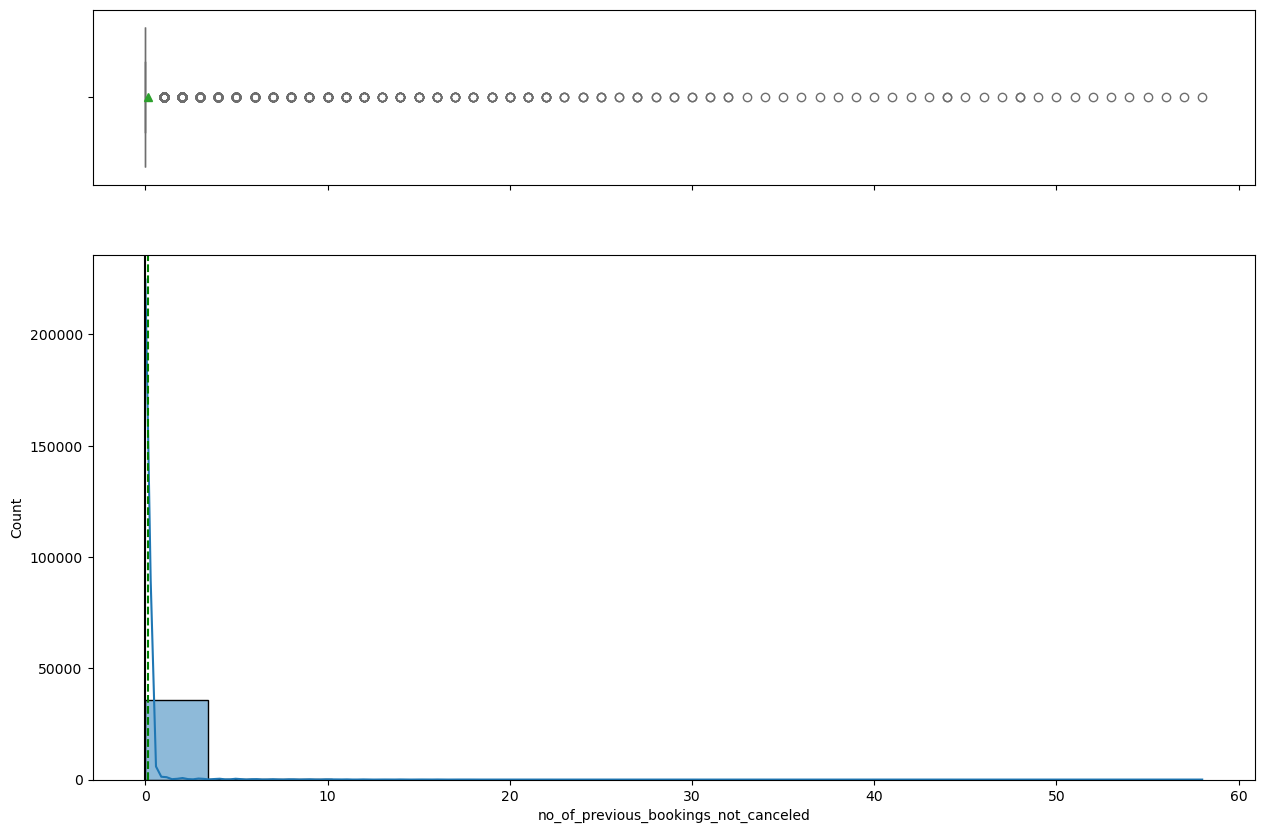

In [24]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")

While there are outliers on the upper end of this feature this may be important information for the model

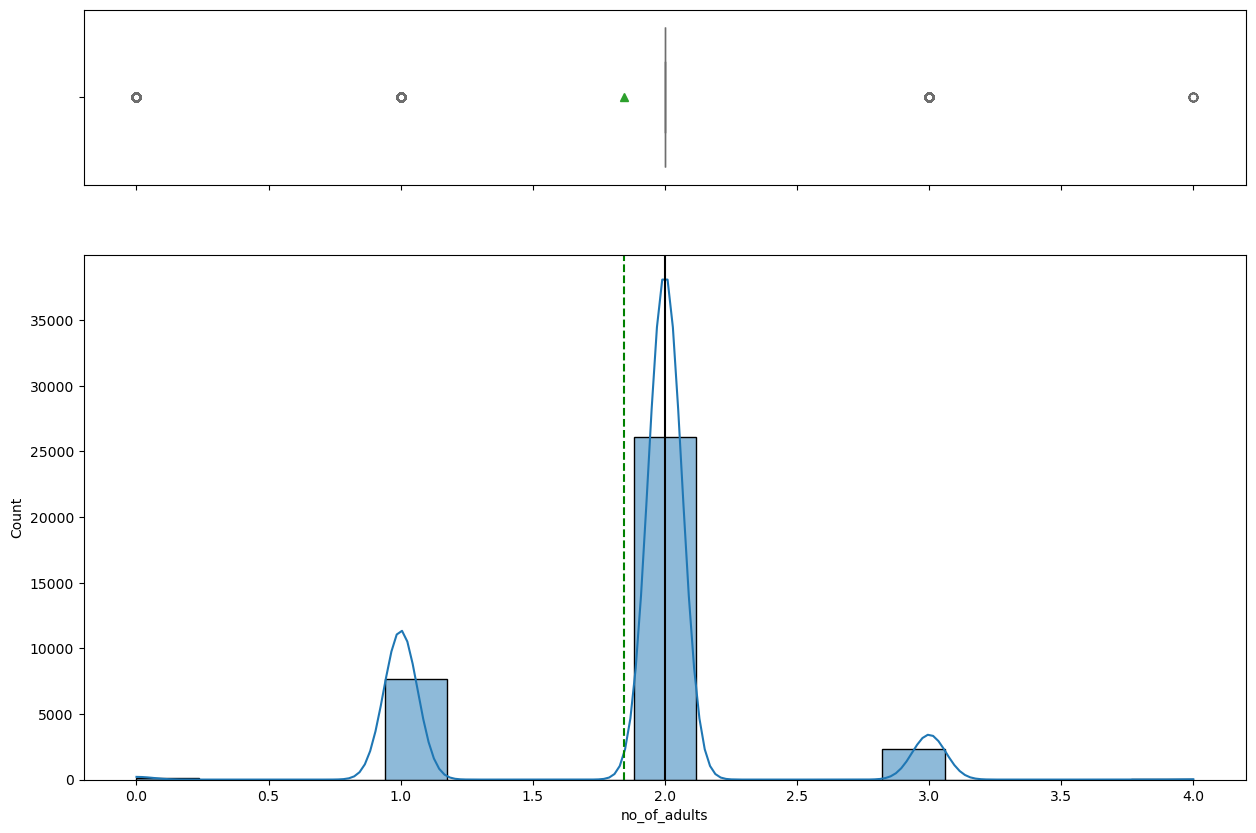

In [26]:
histogram_boxplot(data, "no_of_adults")

No outliers in this feature

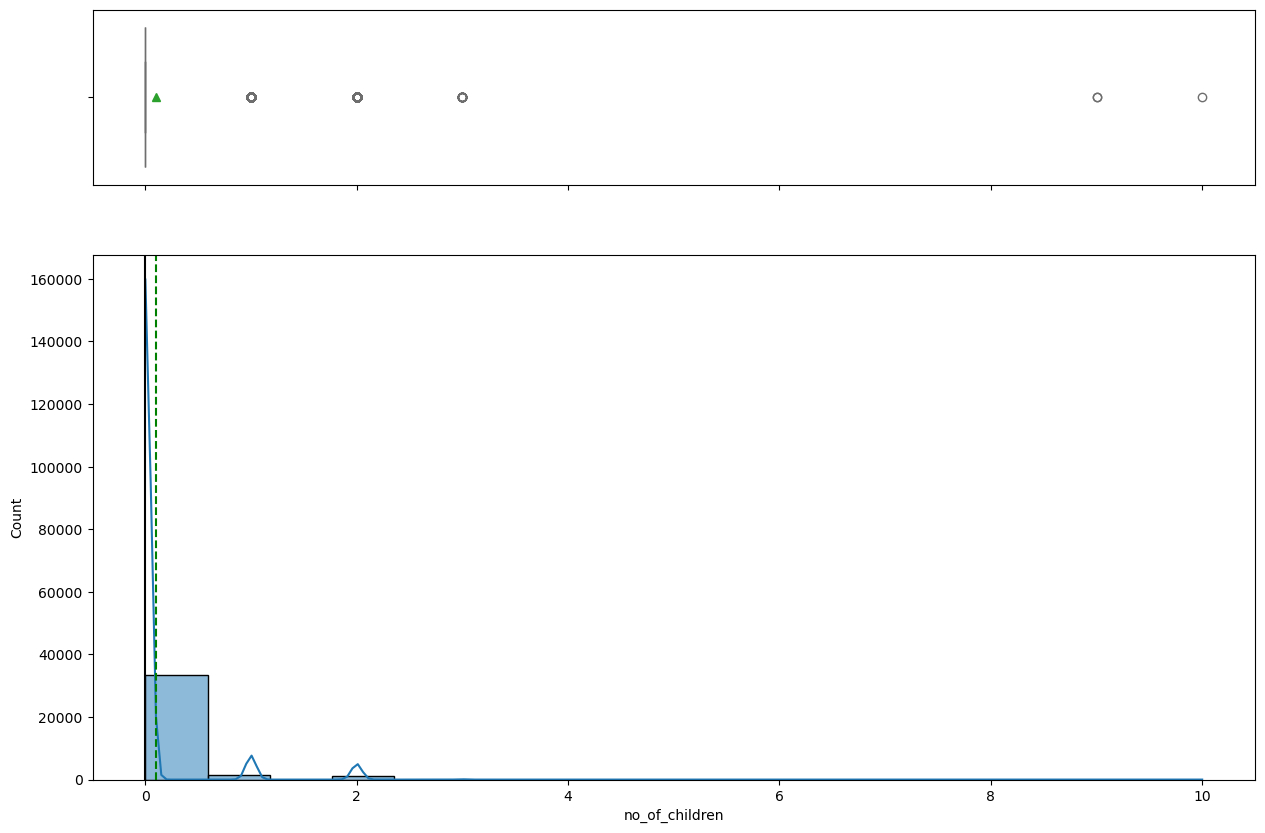

In [28]:
histogram_boxplot(data, "no_of_children")

Certainly there is an outlier in this feature, seems odd so I will address it.

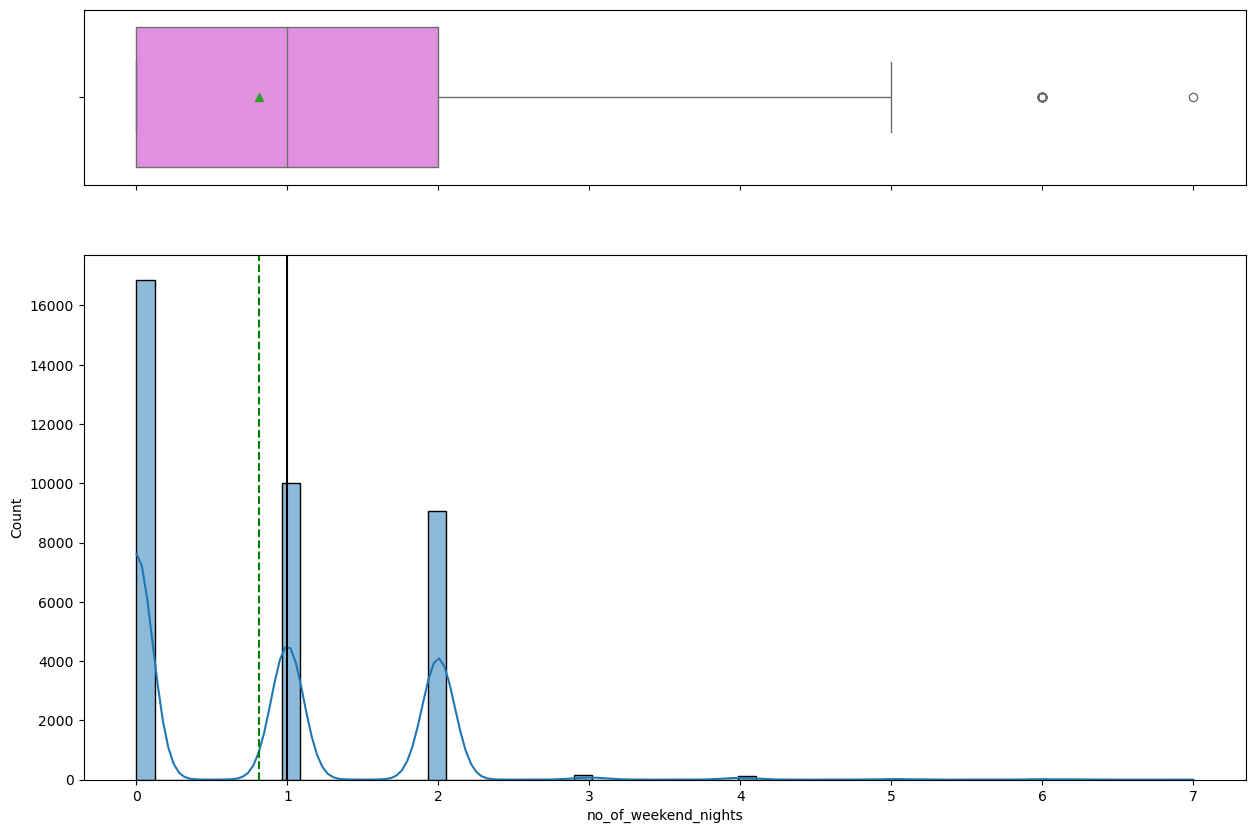

In [30]:
histogram_boxplot(data, "no_of_weekend_nights")

Will address outliers for logistic regression model

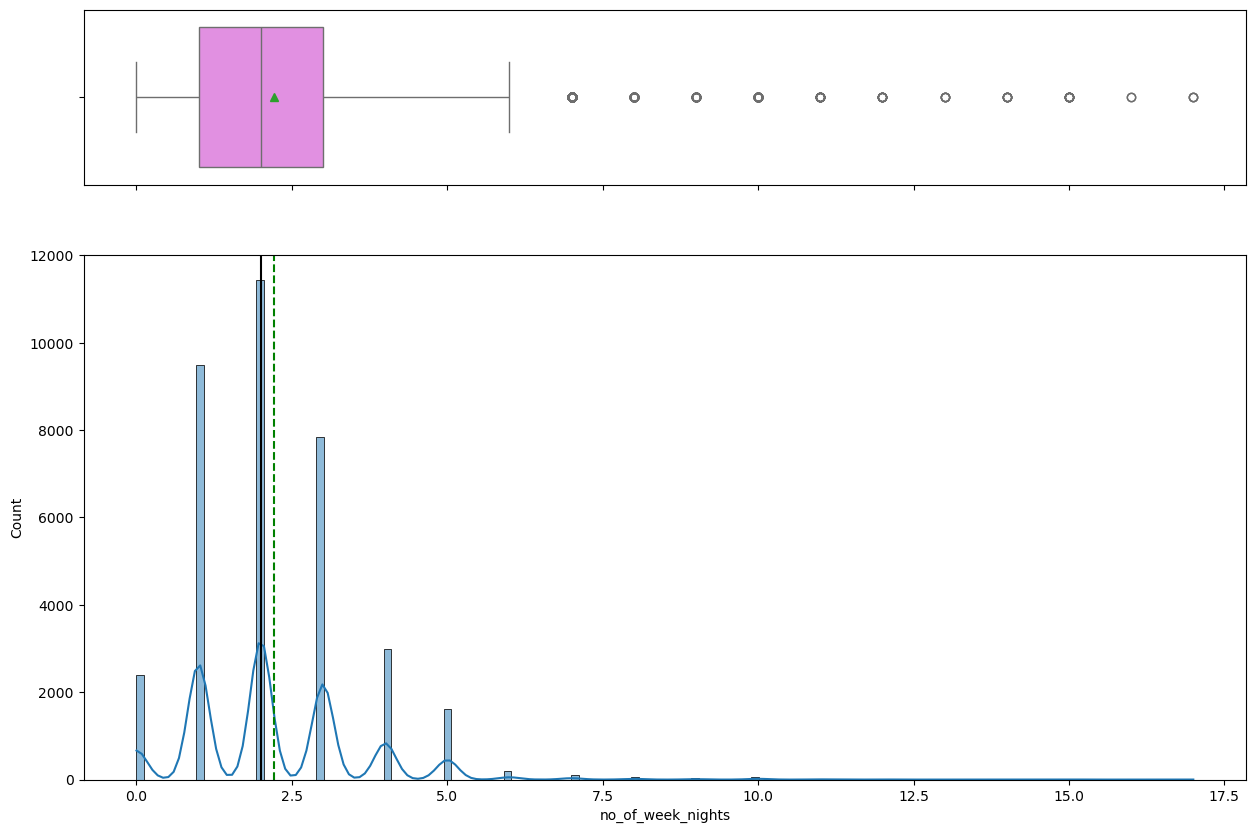

In [32]:
histogram_boxplot(data, "no_of_week_nights")

Will address outliers for logistic regression model

In [34]:
def labeled_barplot(data, feature, perc=False, n=None, hue='coolwarm', legend=False):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


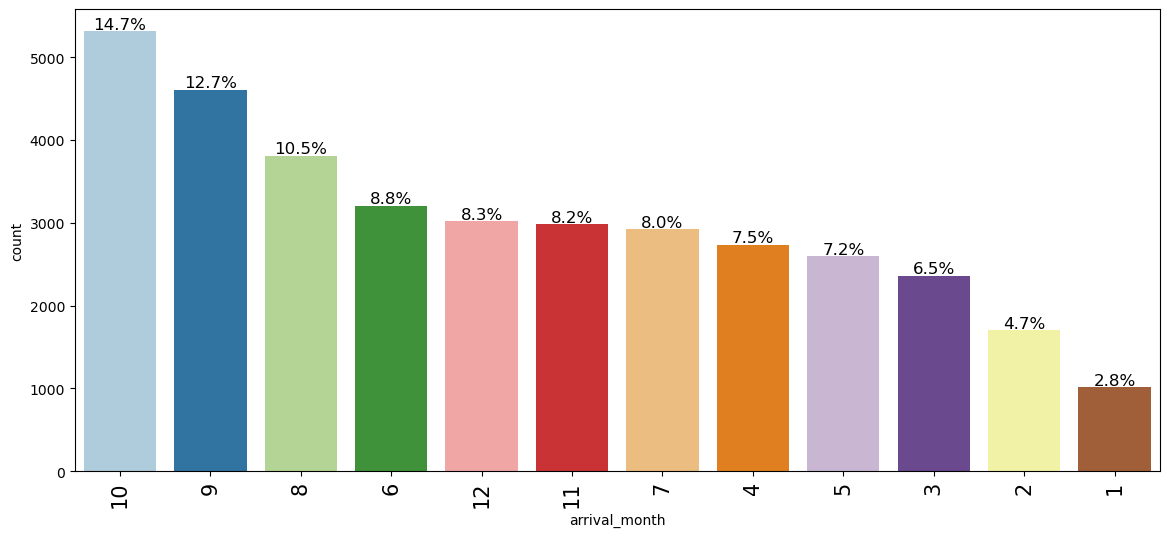

In [35]:
labeled_barplot(data, "arrival_month", perc=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

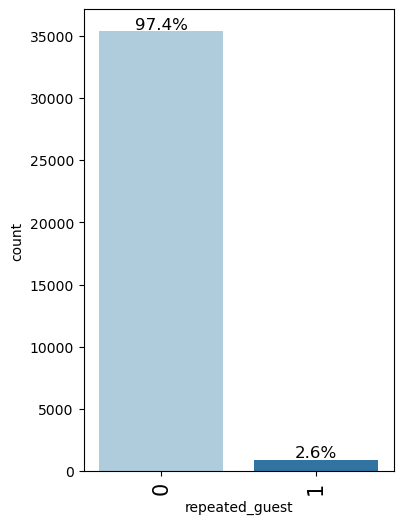

In [39]:
labeled_barplot(data, "repeated_guest", perc=True)

Repeat customers is very low a 2.6%, while there may be some legit reasons for this it is an area of concern and something they should look at.

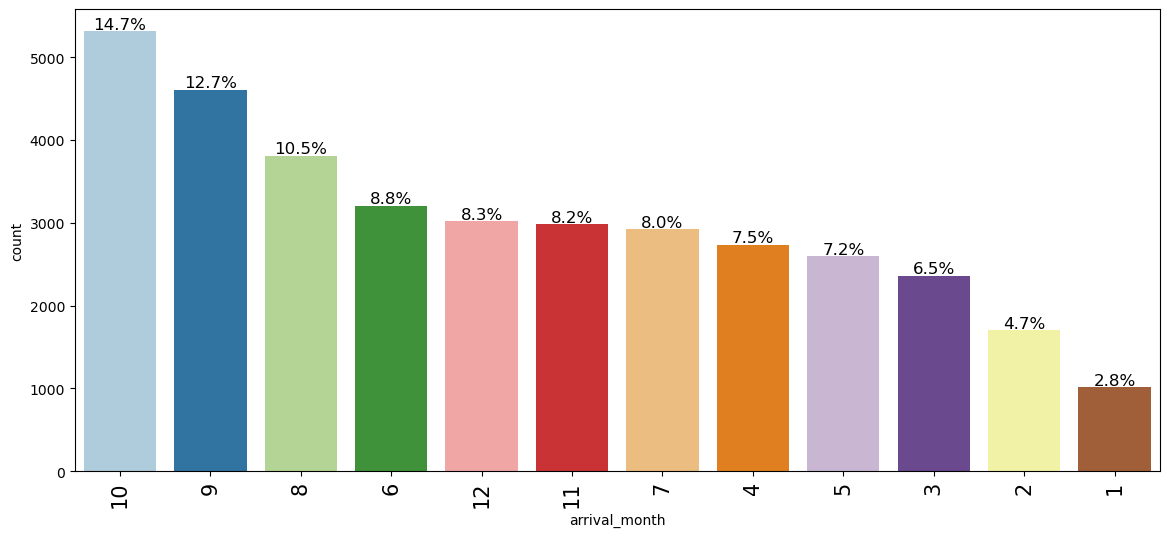

In [41]:
labeled_barplot(data, "arrival_month", perc=True)

The busiest month for the hotel in October, follow by September and August.

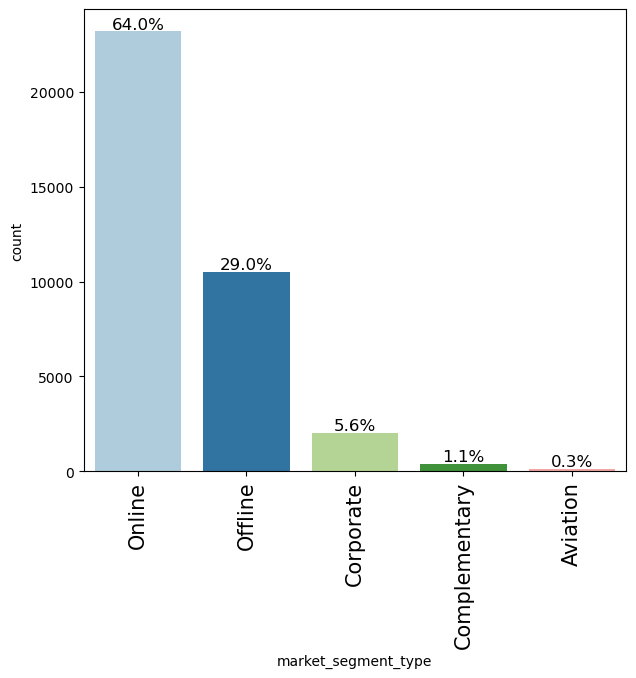

In [43]:
labeled_barplot(data, "market_segment_type", perc=True)

Their largest market segment type is online.

In [45]:
grouped = data.groupby('market_segment_type')['avg_price_per_room'].agg(['mean', 'std', 'median', 'min', 'max'])
grouped

,mean,std,median,min,max
market_segment_type,,,,,
Aviation,100.704000,8.538361,95.0,79.0,110.0
Complementary,3.141765,15.512972,0.0,0.0,170.0
Corporate,82.911740,23.690001,79.0,31.0,220.0
Offline,91.632679,24.995597,90.0,12.0,540.0
Online,112.256855,35.220319,107.1,0.0,375.5


In [46]:
total_bookings = len(data)
canceled_bookings = len(data[data['booking_status'] == 'Canceled'])
cancellation_percentage = (canceled_bookings / total_bookings) * 100
print(f'For this hotel the cancellation rate is {cancellation_percentage:.2f}%')

For this hotel the cancellation rate is 32.76%


In [47]:
repeated_guests = data[data['repeated_guest'] == 1]
canceled_repeated_guests = len(repeated_guests[repeated_guests['booking_status'] == 'Canceled'])
total_repeated_guests = len(repeated_guests)
cancellation_percentage = (canceled_repeated_guests / total_repeated_guests) * 100
print(f"Percentage of repeated guests who cancel: {cancellation_percentage:.2f}%")

Percentage of repeated guests who cancel: 1.72%


In [48]:
grouped = data.groupby('no_of_special_requests')['booking_status'].value_counts().unstack(fill_value=0)

grouped['cancellation_percentage'] = (grouped['Canceled'] / (grouped['Not_Canceled'] + grouped['Canceled'])) * 100
print(grouped)

booking_status          Canceled  Not_Canceled  cancellation_percentage
no_of_special_requests                                                 
0                           8545         11232                43.206755
1                           2703          8670                23.766816
2                            637          3727                14.596700
3                              0           675                 0.000000
4                              0            78                 0.000000
5                              0             8                 0.000000


The data indicates that the higher the number of special requests the lower rate of cancellation

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Values
There are no missing values, so nothign to treat

Copying data for use in Tree Based Model

In [54]:
df_tree = data.copy()
df_tree.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Outlier Treatment

#### Average Price Per Room

In [57]:
# Outliers capped at 3 standard deviations
mean = data['avg_price_per_room'].mean()
std = data['avg_price_per_room'].std()

k=3
lower_bound = mean - k * std
upper_bound = mean + k * std

data['avg_price_per_room'] = np.where(data['avg_price_per_room'] > upper_bound, upper_bound, data['avg_price_per_room'])
data['avg_price_per_room'] = np.where(data['avg_price_per_room'] < lower_bound, lower_bound, data['avg_price_per_room'])

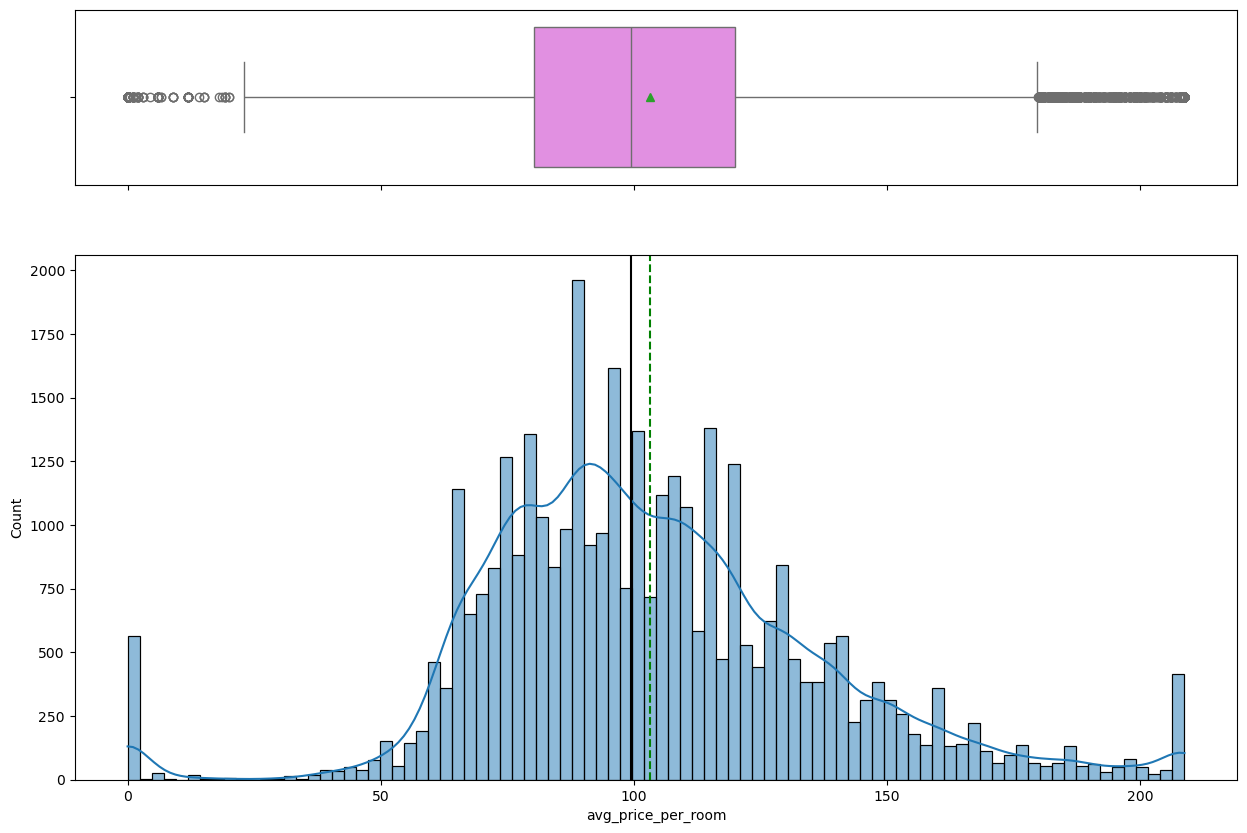

In [58]:
histogram_boxplot(data, "avg_price_per_room")

#### Lead Time

In [60]:
# Outliers capped at 3 standard deviations
mean = data['lead_time'].mean()
std = data['lead_time'].std()

k=3
upper_bound = mean + k * std

data['lead_time'] = np.where(data['lead_time'] > upper_bound, upper_bound, data['lead_time'])

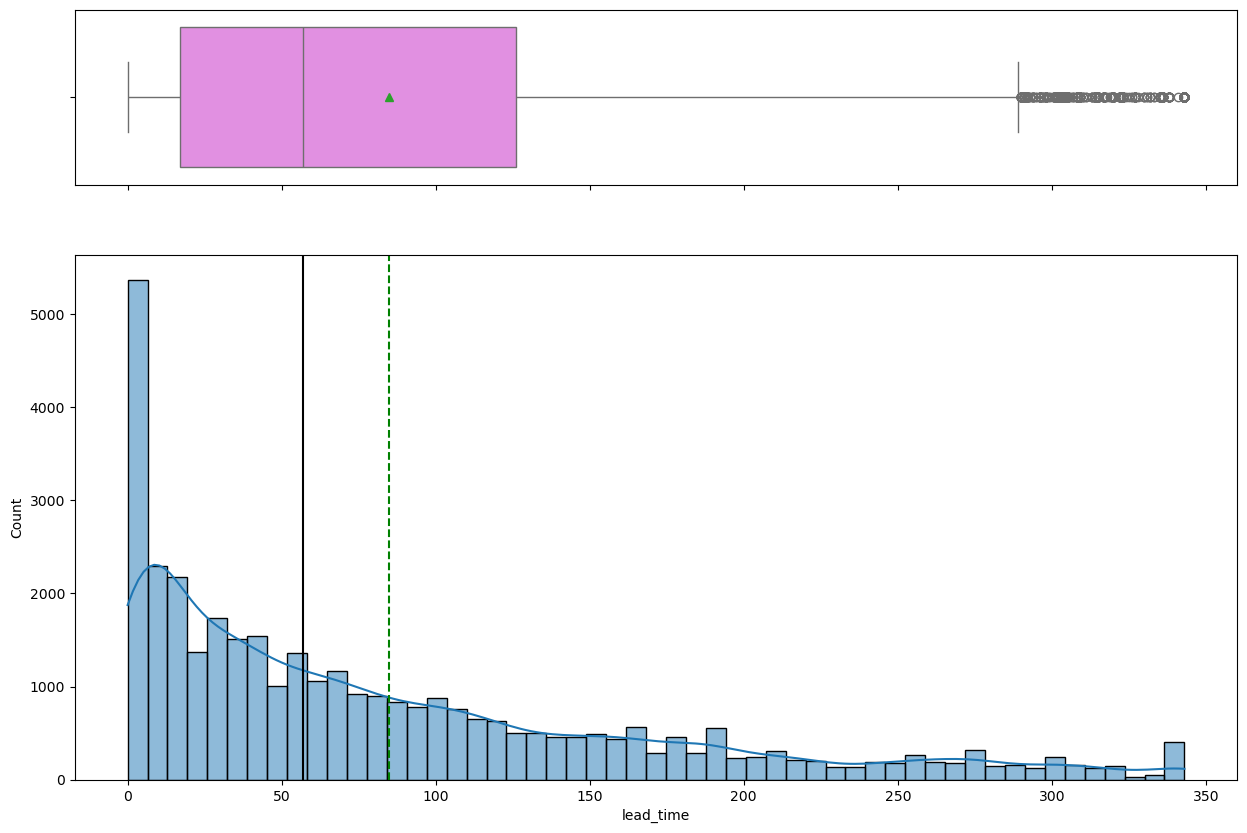

In [61]:
histogram_boxplot(data, "lead_time")

## EDA 2

- It is a good idea to explore the data once again after manipulating it.

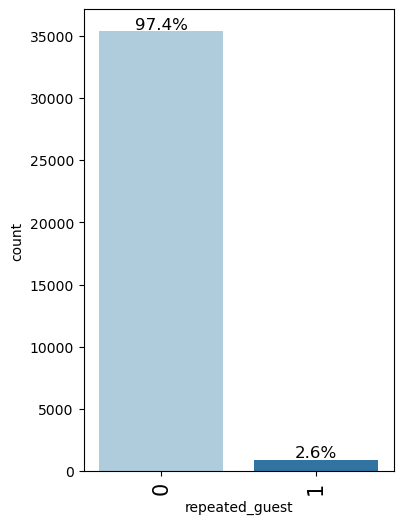

In [64]:
labeled_barplot(data, "repeated_guest", perc=True)

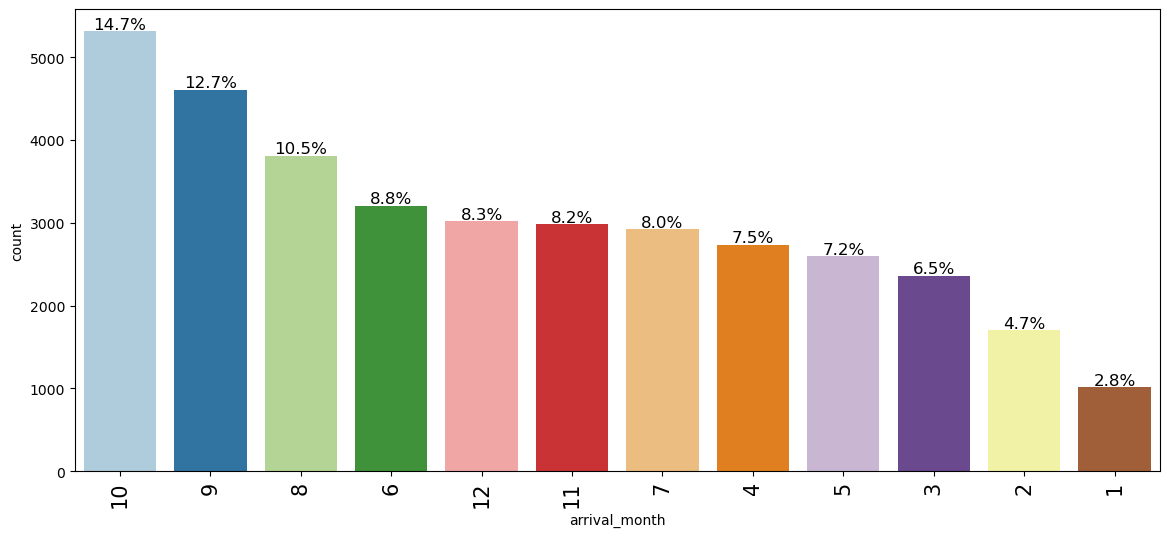

In [65]:
labeled_barplot(data, "arrival_month", perc=True)

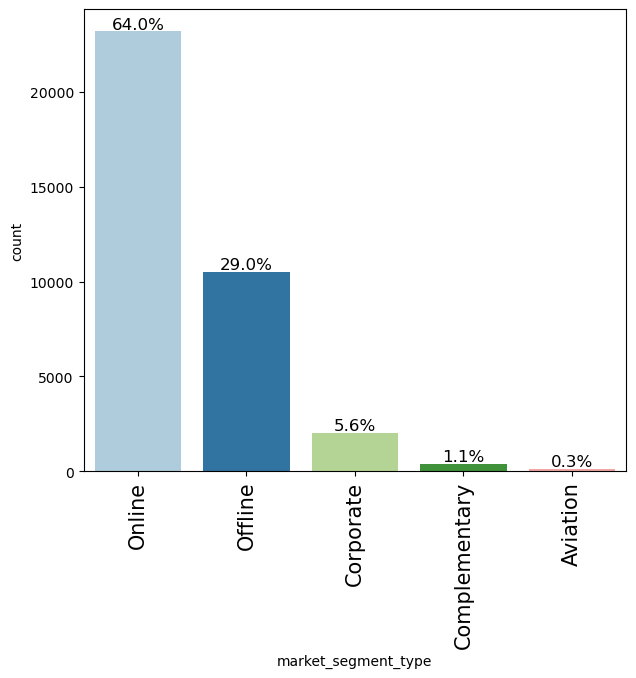

In [66]:
labeled_barplot(data, "market_segment_type", perc=True)

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

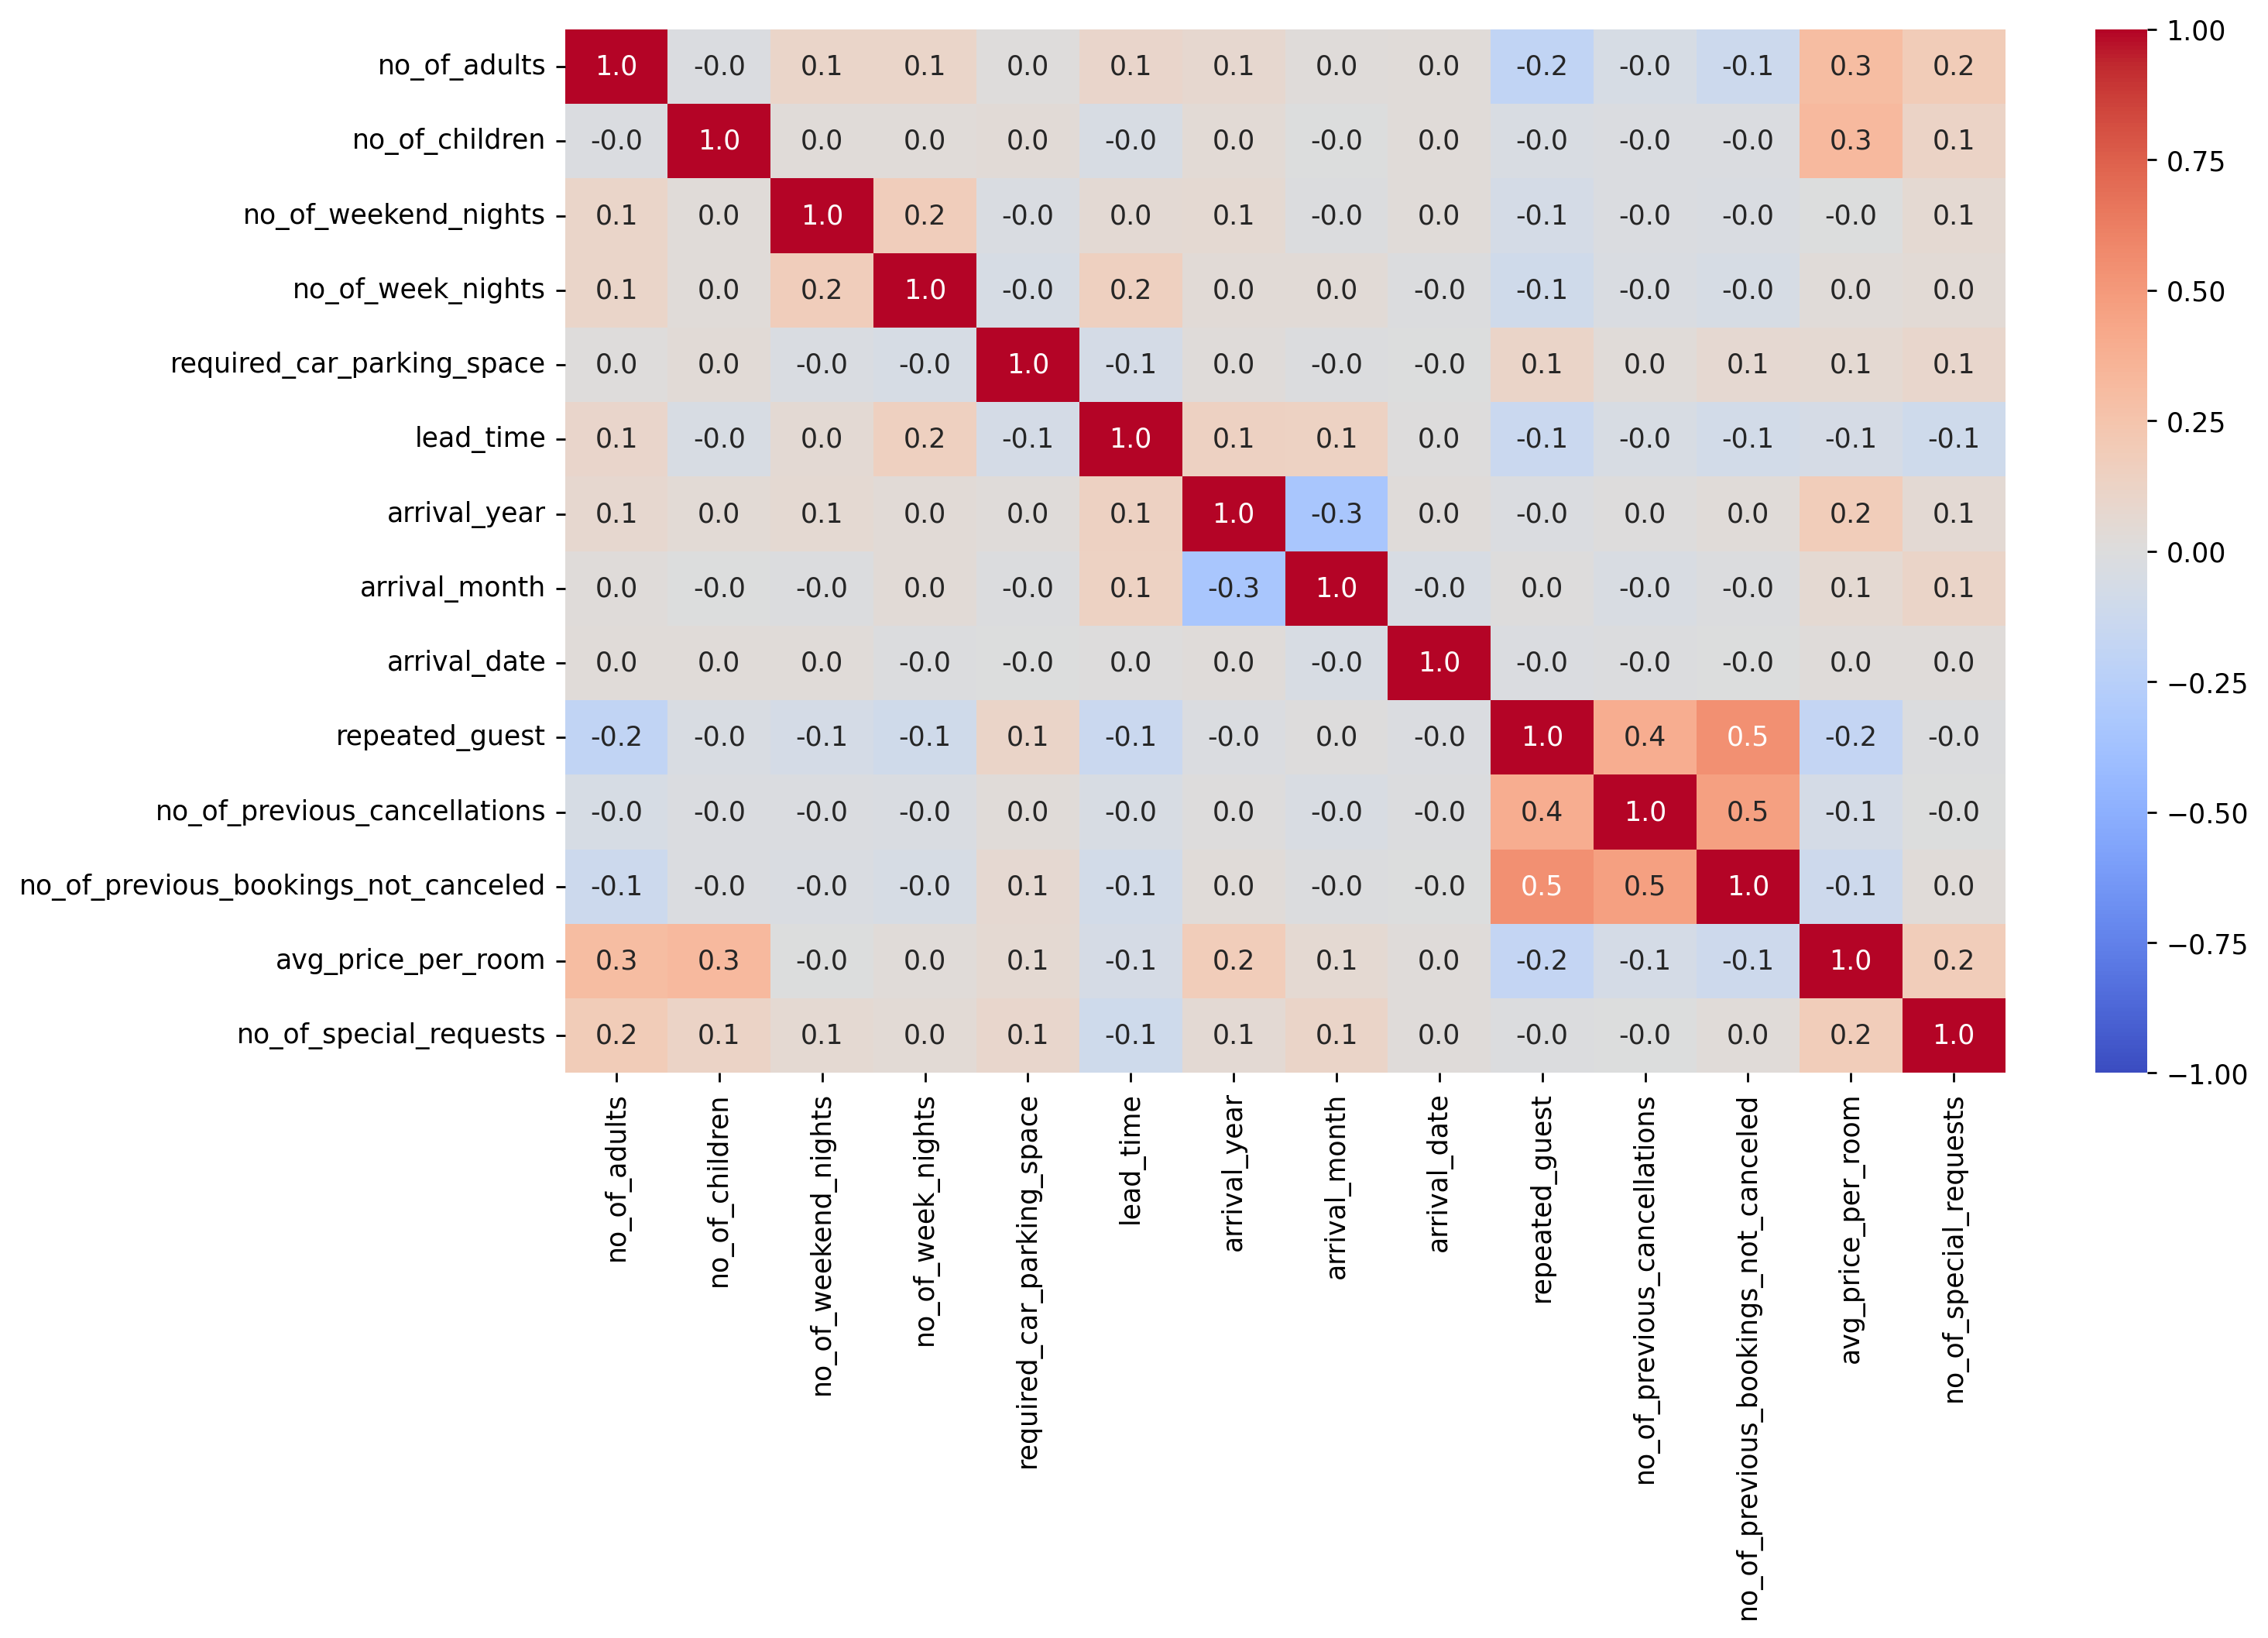

In [70]:
plt.figure(figsize=(12, 7), dpi=250)
nums = data.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(data=data[nums].corr(), vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".1f") ;

Multicollinearity is not apparent in the dataset, all of the correlation coefficients are quite low. 


### Preparaing Data for Modeling for Logistic Regression

In [73]:
# Converting category features to numeric
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
#len(booking_status)
data['b_status'] = label_encoder.fit_transform(data['booking_status'])
data.drop("booking_status", axis=1, inplace=True)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,b_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224.0,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0,Room_Type 1,5.0,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1.0,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48.0,2018,4,11,Online,0,0,0,94.50,0,0


In [74]:
data_encoded = pd.get_dummies(data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
data_encoded.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224.0,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5.0,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1.0,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211.0,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48.0,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


In [75]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  float64
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [76]:
data = data_encoded.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224.0,2017,10,2,0,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5.0,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1.0,2018,2,28,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211.0,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48.0,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True


In [77]:
# X and y split
y = data['b_status']
X = data.drop(["b_status"], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [79]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
feature_names = X.columns
print(feature_names)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')


## Building a Logistic Regression model

In [82]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'l1_ratio': [0, 0.5, 1]  
}

In [83]:
model = LogisticRegression(class_weight='balanced', max_iter=5000, solver='liblinear')

In [84]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

In [85]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy', verbose=1)

In [86]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'l1_ratio': 0, 'penalty': 'l2'}


In [87]:
best_model = grid_search.best_estimator_

## Model performance evaluation

In [90]:
y_pred = best_model.predict(X_test)

In [91]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.7811164713990352


In [92]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70      2409
           1       0.87      0.79      0.83      4846

    accuracy                           0.78      7255
   macro avg       0.76      0.78      0.76      7255
weighted avg       0.80      0.78      0.79      7255



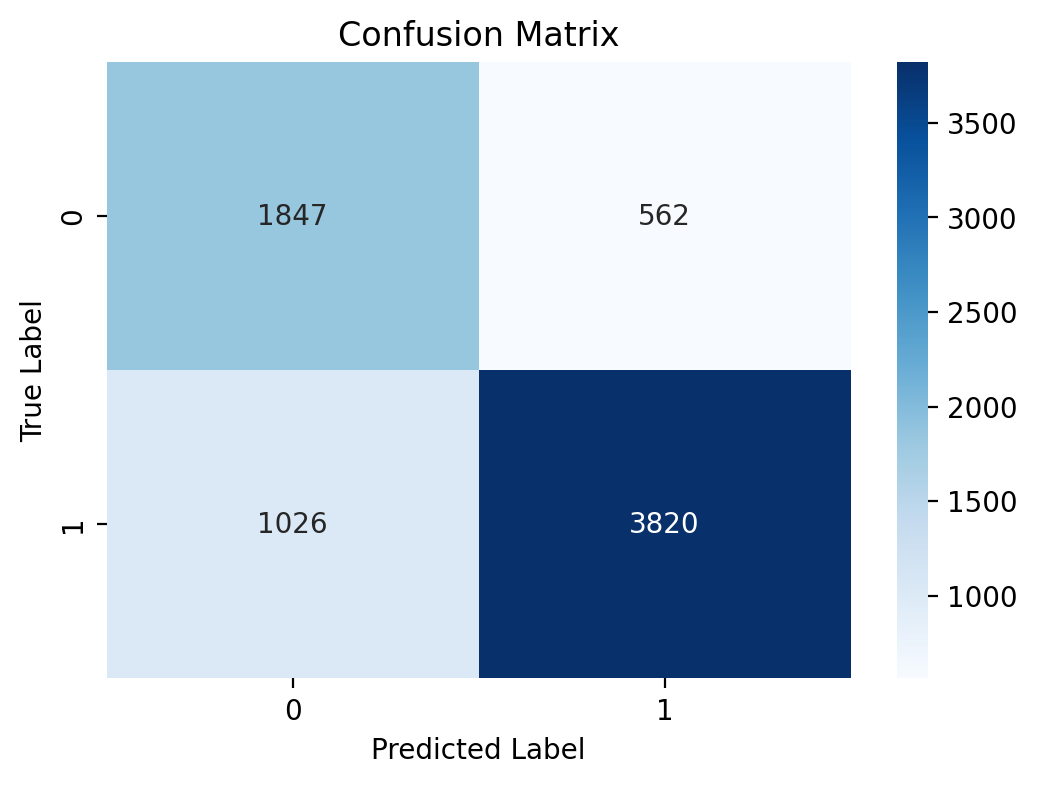

In [93]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Final Model Summary

In [96]:
import shap

In [97]:
X_test = pd.DataFrame(X_test, columns=feature_names)

In [98]:
X_train  = pd.DataFrame(X_train, columns=feature_names)

In [125]:
ex = shap.Explainer(best_model.predict_proba, X_train)

In [100]:
shap_values = ex(X_test)

PermutationExplainer explainer: 7256it [01:41, 66.38it/s]                                                              


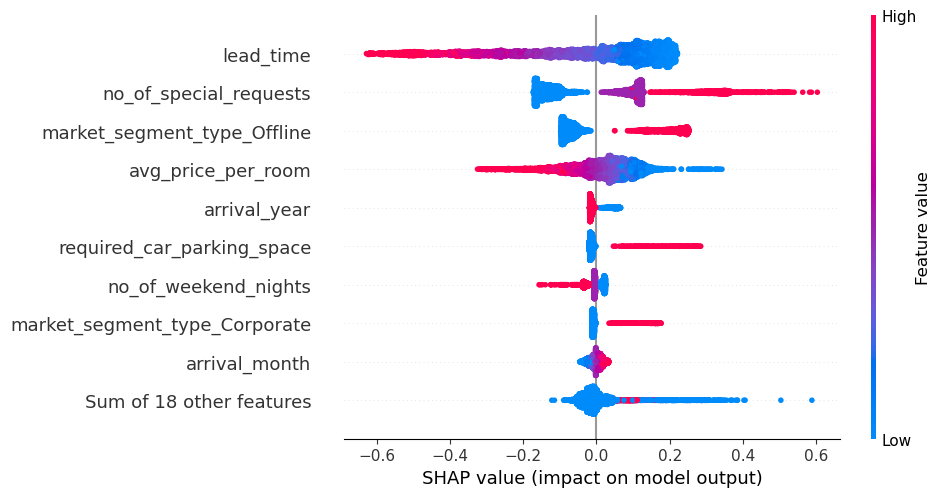

In [106]:
class_index = 1
shap.plots.beeswarm(shap_values[:,:,class_index])

## Building a Decision Tree model

In [173]:
model_tree = DecisionTreeClassifier(random_state=63, max_depth=5, class_weight="balanced",  min_samples_split=150, max_leaf_nodes=50)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=50,
                       min_samples_split=150, random_state=63)

In [175]:
y_pred = model_tree.predict(X_test)

In [177]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8288077188146106


In [179]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.74      2409
           1       0.88      0.87      0.87      4846

    accuracy                           0.83      7255
   macro avg       0.81      0.81      0.81      7255
weighted avg       0.83      0.83      0.83      7255



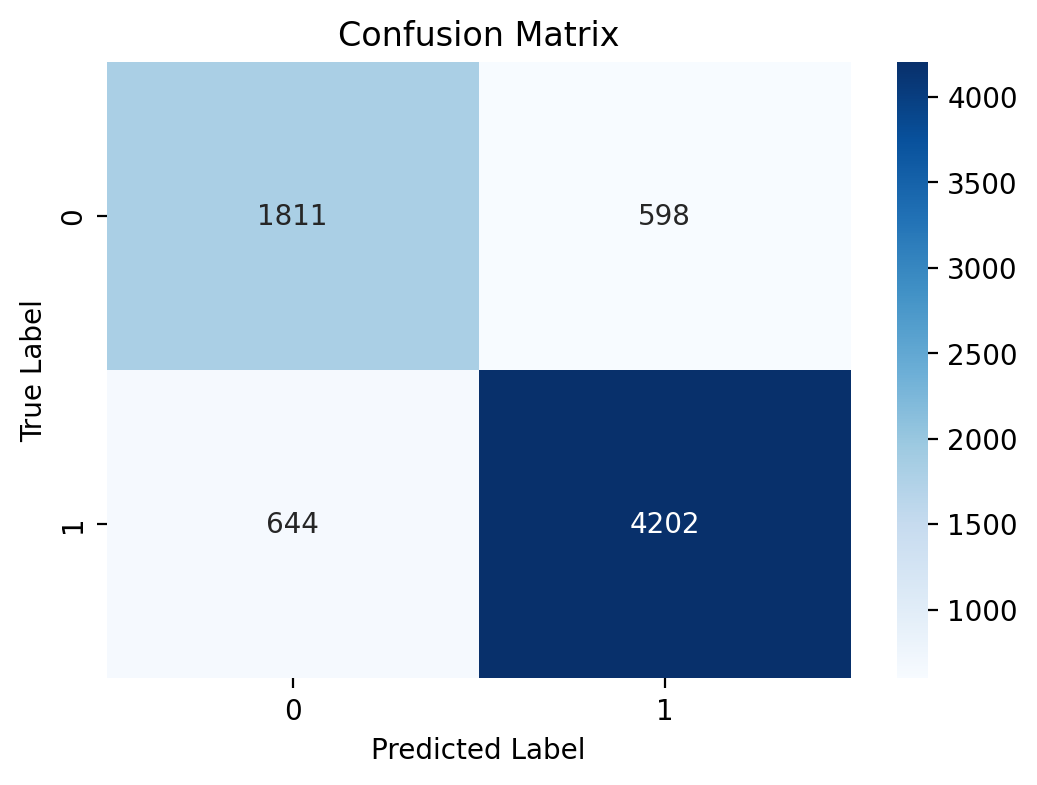

In [181]:
mc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(mc, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [184]:
ex = shap.Explainer(model_tree.predict_proba, X_train)

In [186]:
shap_values_tree = ex(X_test)

PermutationExplainer explainer: 7256it [01:42, 63.81it/s]                                                              


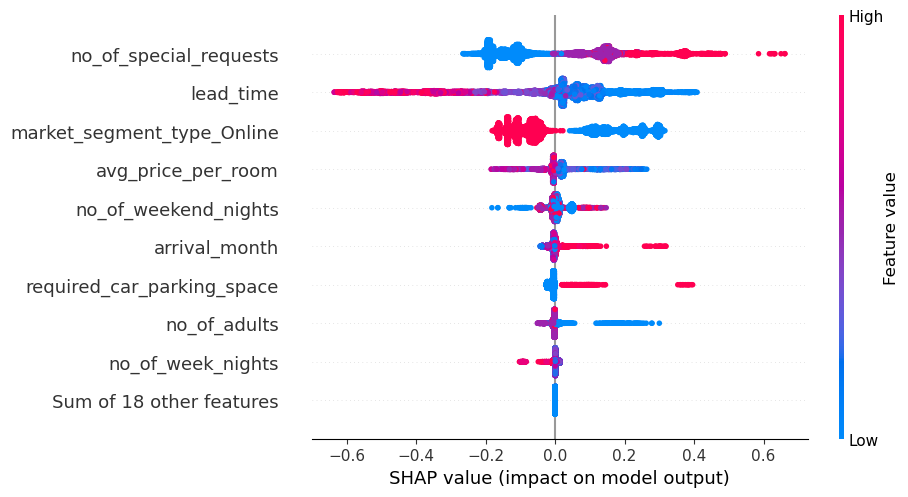

In [187]:
class_index = 1
shap.plots.beeswarm(shap_values_tree[:,:,class_index])

## Do we need to prune the tree?

No, I don't thiunk we need to prune the tree, the results look pretty good.

## Model Performance Comparison and Conclusions

The decision tree model worked better on this dataset than Logistic Regression, but not as much as I thought. Looking at the features that effect the model the first two are the same but in reserved order. An increase in the number of special request increase the chance that the reseveration will be honored and the customer shows up. Conversly, the longer the lead time the more likely it is that the customer will not show up. 

If the reservation is made online there is also a higher probability the reservation will be cancelled. Just as more expensive have a higher cancellation rate. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

#### Cancellations and Refunds
Reservations made online have a higher cancellation rate than other sources, for online bookings you may want to offer a non-refundable rate that is a little lower than the refundable rate. 

Longer lead time reservations also have a higher cancellation rate, perhaps a courtesy call a period away from the arrival date to ask if they are still coming, and provide some sort of reward - meal plan upgrade maybe to those who are still interested. 

#### Other Ideas
Most concerning to me, the data indicates that are very few returning customers. The owners should determine the cause and address the issues. Further research and data required in this area. 

Overbooking? I don't have the background to determine if overbooking is a good idea, but I think it should considered the amount could vary based on historical records months that are slow or have low occupanccy rates. 
